<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مشکل بیش‌برازش داده‌ها یا Overfitting و معرفی Dropout</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه بدون Dropout</div>



In [1]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 [==============================] - 22s 104ms/step - loss: 2.2233 - accuracy: 0.1861 - val_loss: 2.0797 - val_accuracy: 0.3400
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 1.9889 - accuracy: 0.4697 - val_loss: 1.8246 - val_accuracy: 0.6200
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 1.6978 - accuracy: 0.6735 - val_loss: 1.5084 - val_accuracy: 0.6850
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 1.3603 - accuracy: 0.7463 - val_loss: 1.1714 - val_accuracy: 0.7800
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 1.0428 - accuracy: 0.8013 - val_loss: 0.8813 - val_accuracy: 0.8300
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7607 - accuracy: 0.8501 - val_loss: 0.6759 - val_accuracy: 0.8550
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6057 - accuracy: 0.8611 - val_loss: 0.5510 - val_accuracy: 0.8700
Epoch 8/150
8/8 [=======

8/8 [==============================] - 0s 5ms/step - loss: 0.0714 - accuracy: 0.9880 - val_loss: 0.2403 - val_accuracy: 0.9350
Epoch 60/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0702 - accuracy: 0.9859 - val_loss: 0.2400 - val_accuracy: 0.9250
Epoch 61/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9897 - val_loss: 0.2452 - val_accuracy: 0.9250
Epoch 62/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9835 - val_loss: 0.2396 - val_accuracy: 0.9300
Epoch 63/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9917 - val_loss: 0.2423 - val_accuracy: 0.9350
Epoch 64/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9906 - val_loss: 0.2456 - val_accuracy: 0.9300
Epoch 65/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0553 - accuracy: 0.9933 - val_loss: 0.2411 - val_accuracy: 0.9300
Epoch 66/150
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 0.9991 - val_loss: 0.2711 - val_accuracy: 0.9200
Epoch 118/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 0.2719 - val_accuracy: 0.9250
Epoch 119/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2746 - val_accuracy: 0.9200
Epoch 120/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 0.9997 - val_loss: 0.2726 - val_accuracy: 0.9300
Epoch 121/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.2747 - val_accuracy: 0.9200
Epoch 122/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9998 - val_loss: 0.2765 - val_accuracy: 0.9300
Epoch 123/150
8/8 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9995 - val_loss: 0.2750 - val_accuracy: 0.9250
Epoch 124/150
8/8 [========

Test Accuracy: 0.9200000166893005 
Maximum Test Acuracy During Training:  0.9350000023841858


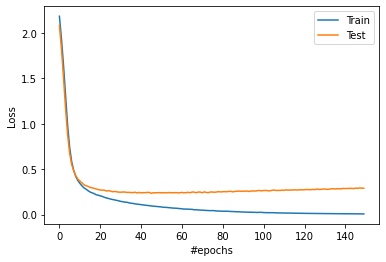

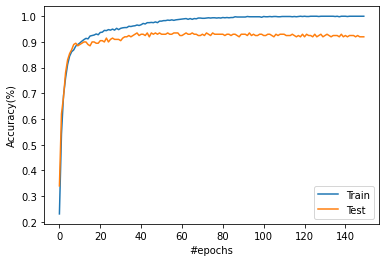

In [2]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>



In [7]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 [==============================] - 2s 64ms/step - loss: 2.2936 - accuracy: 0.1428 - val_loss: 2.1227 - val_accuracy: 0.4150
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 2.0810 - accuracy: 0.3200 - val_loss: 1.9229 - val_accuracy: 0.6500
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 1.8547 - accuracy: 0.5164 - val_loss: 1.6742 - val_accuracy: 0.7300
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 1.6218 - accuracy: 0.6114 - val_loss: 1.3801 - val_accuracy: 0.8000
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 1.3858 - accuracy: 0.6614 - val_loss: 1.1005 - val_accuracy: 0.8250
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 1.1382 - accuracy: 0.7186 - val_loss: 0.8825 - val_accuracy: 0.8500
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.9519 - accuracy: 0.7589 - val_loss: 0.7304 - val_accuracy: 0.8550
Epoch 8/150
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.2578 - accuracy: 0.9071 - val_loss: 0.2297 - val_accuracy: 0.9350
Epoch 60/150
8/8 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.9219 - val_loss: 0.2292 - val_accuracy: 0.9250
Epoch 61/150
8/8 [==============================] - 0s 9ms/step - loss: 0.2172 - accuracy: 0.9330 - val_loss: 0.2268 - val_accuracy: 0.9250
Epoch 62/150
8/8 [==============================] - 0s 9ms/step - loss: 0.2611 - accuracy: 0.9103 - val_loss: 0.2255 - val_accuracy: 0.9300
Epoch 63/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1922 - accuracy: 0.9407 - val_loss: 0.2199 - val_accuracy: 0.9350
Epoch 64/150
8/8 [==============================] - 0s 7ms/step - loss: 0.2418 - accuracy: 0.9039 - val_loss: 0.2160 - val_accuracy: 0.9400
Epoch 65/150
8/8 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.9105 - val_loss: 0.2200 - val_accuracy: 0.9300
Epoch 66/150
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.1268 - accuracy: 0.9492 - val_loss: 0.2184 - val_accuracy: 0.9400
Epoch 118/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9583 - val_loss: 0.2219 - val_accuracy: 0.9400
Epoch 119/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.9597 - val_loss: 0.2306 - val_accuracy: 0.9300
Epoch 120/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1312 - accuracy: 0.9594 - val_loss: 0.2301 - val_accuracy: 0.9300
Epoch 121/150
8/8 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9616 - val_loss: 0.2313 - val_accuracy: 0.9250
Epoch 122/150
8/8 [==============================] - 0s 5ms/step - loss: 0.1403 - accuracy: 0.9564 - val_loss: 0.2318 - val_accuracy: 0.9250
Epoch 123/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1417 - accuracy: 0.9535 - val_loss: 0.2223 - val_accuracy: 0.9300
Epoch 124/150
8/8 [========

Test Accuracy: 0.9350000023841858 
Maximum Test Acuracy During Training:  0.9449999928474426


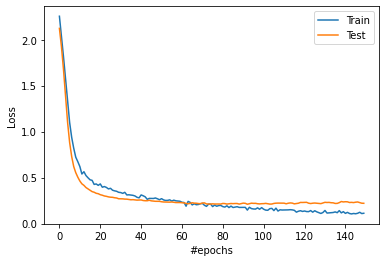

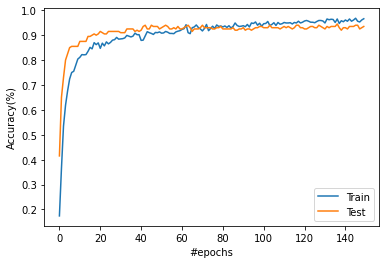

In [8]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()